# Summary
The file pulled directly from the census (summary file one, titled P1

In [1]:
from features.population_old import PopulationOld
from features.population import Population
from detroit_geos import get_detroit_census_geos, get_detroit_boundaries
detroit = get_detroit_boundaries()
block = get_detroit_census_geos(decennial_census_year=2010,target_geo_grain='block')


In [4]:
pop_old = PopulationOld(decennial_census_year=2010,population_data_path='population',verbose=False).construct_feature('block')
pop_new = Population(decennial_census_year=2010,population_data_path='population', verbose=False).construct_feature('block')

Data not yet loaded, loading all data
Loaded 6778 rows
Data not yet cleansed, cleaning
clean data has 6778 rows
cleansed data validator: geo_id looks good
Generate index not run, or was run on the wrong grain. Creating index on block grain
9563 of 16341 blocks are unaccounted for


In [ ]:
t = pd.concat((block.rename(columns={'geo_id':'block'}).set_index('block'),pop_old.rename(columns={'population':'old'}),pop_new.rename(columns={'population':'new'})),axis=1)
t.head()

In [8]:
tt = t.assign(match=lambda x: x.old == x.new,
          non_null_mismatch=lambda x: (x.new != x.old) & (x.old.notnull()))
tt.loc[:,['match','non_null_mismatch']].sum()

match                6778
non_null_mismatch       0
dtype: int64

[Text(0.5, 1.0, 'actual population')]

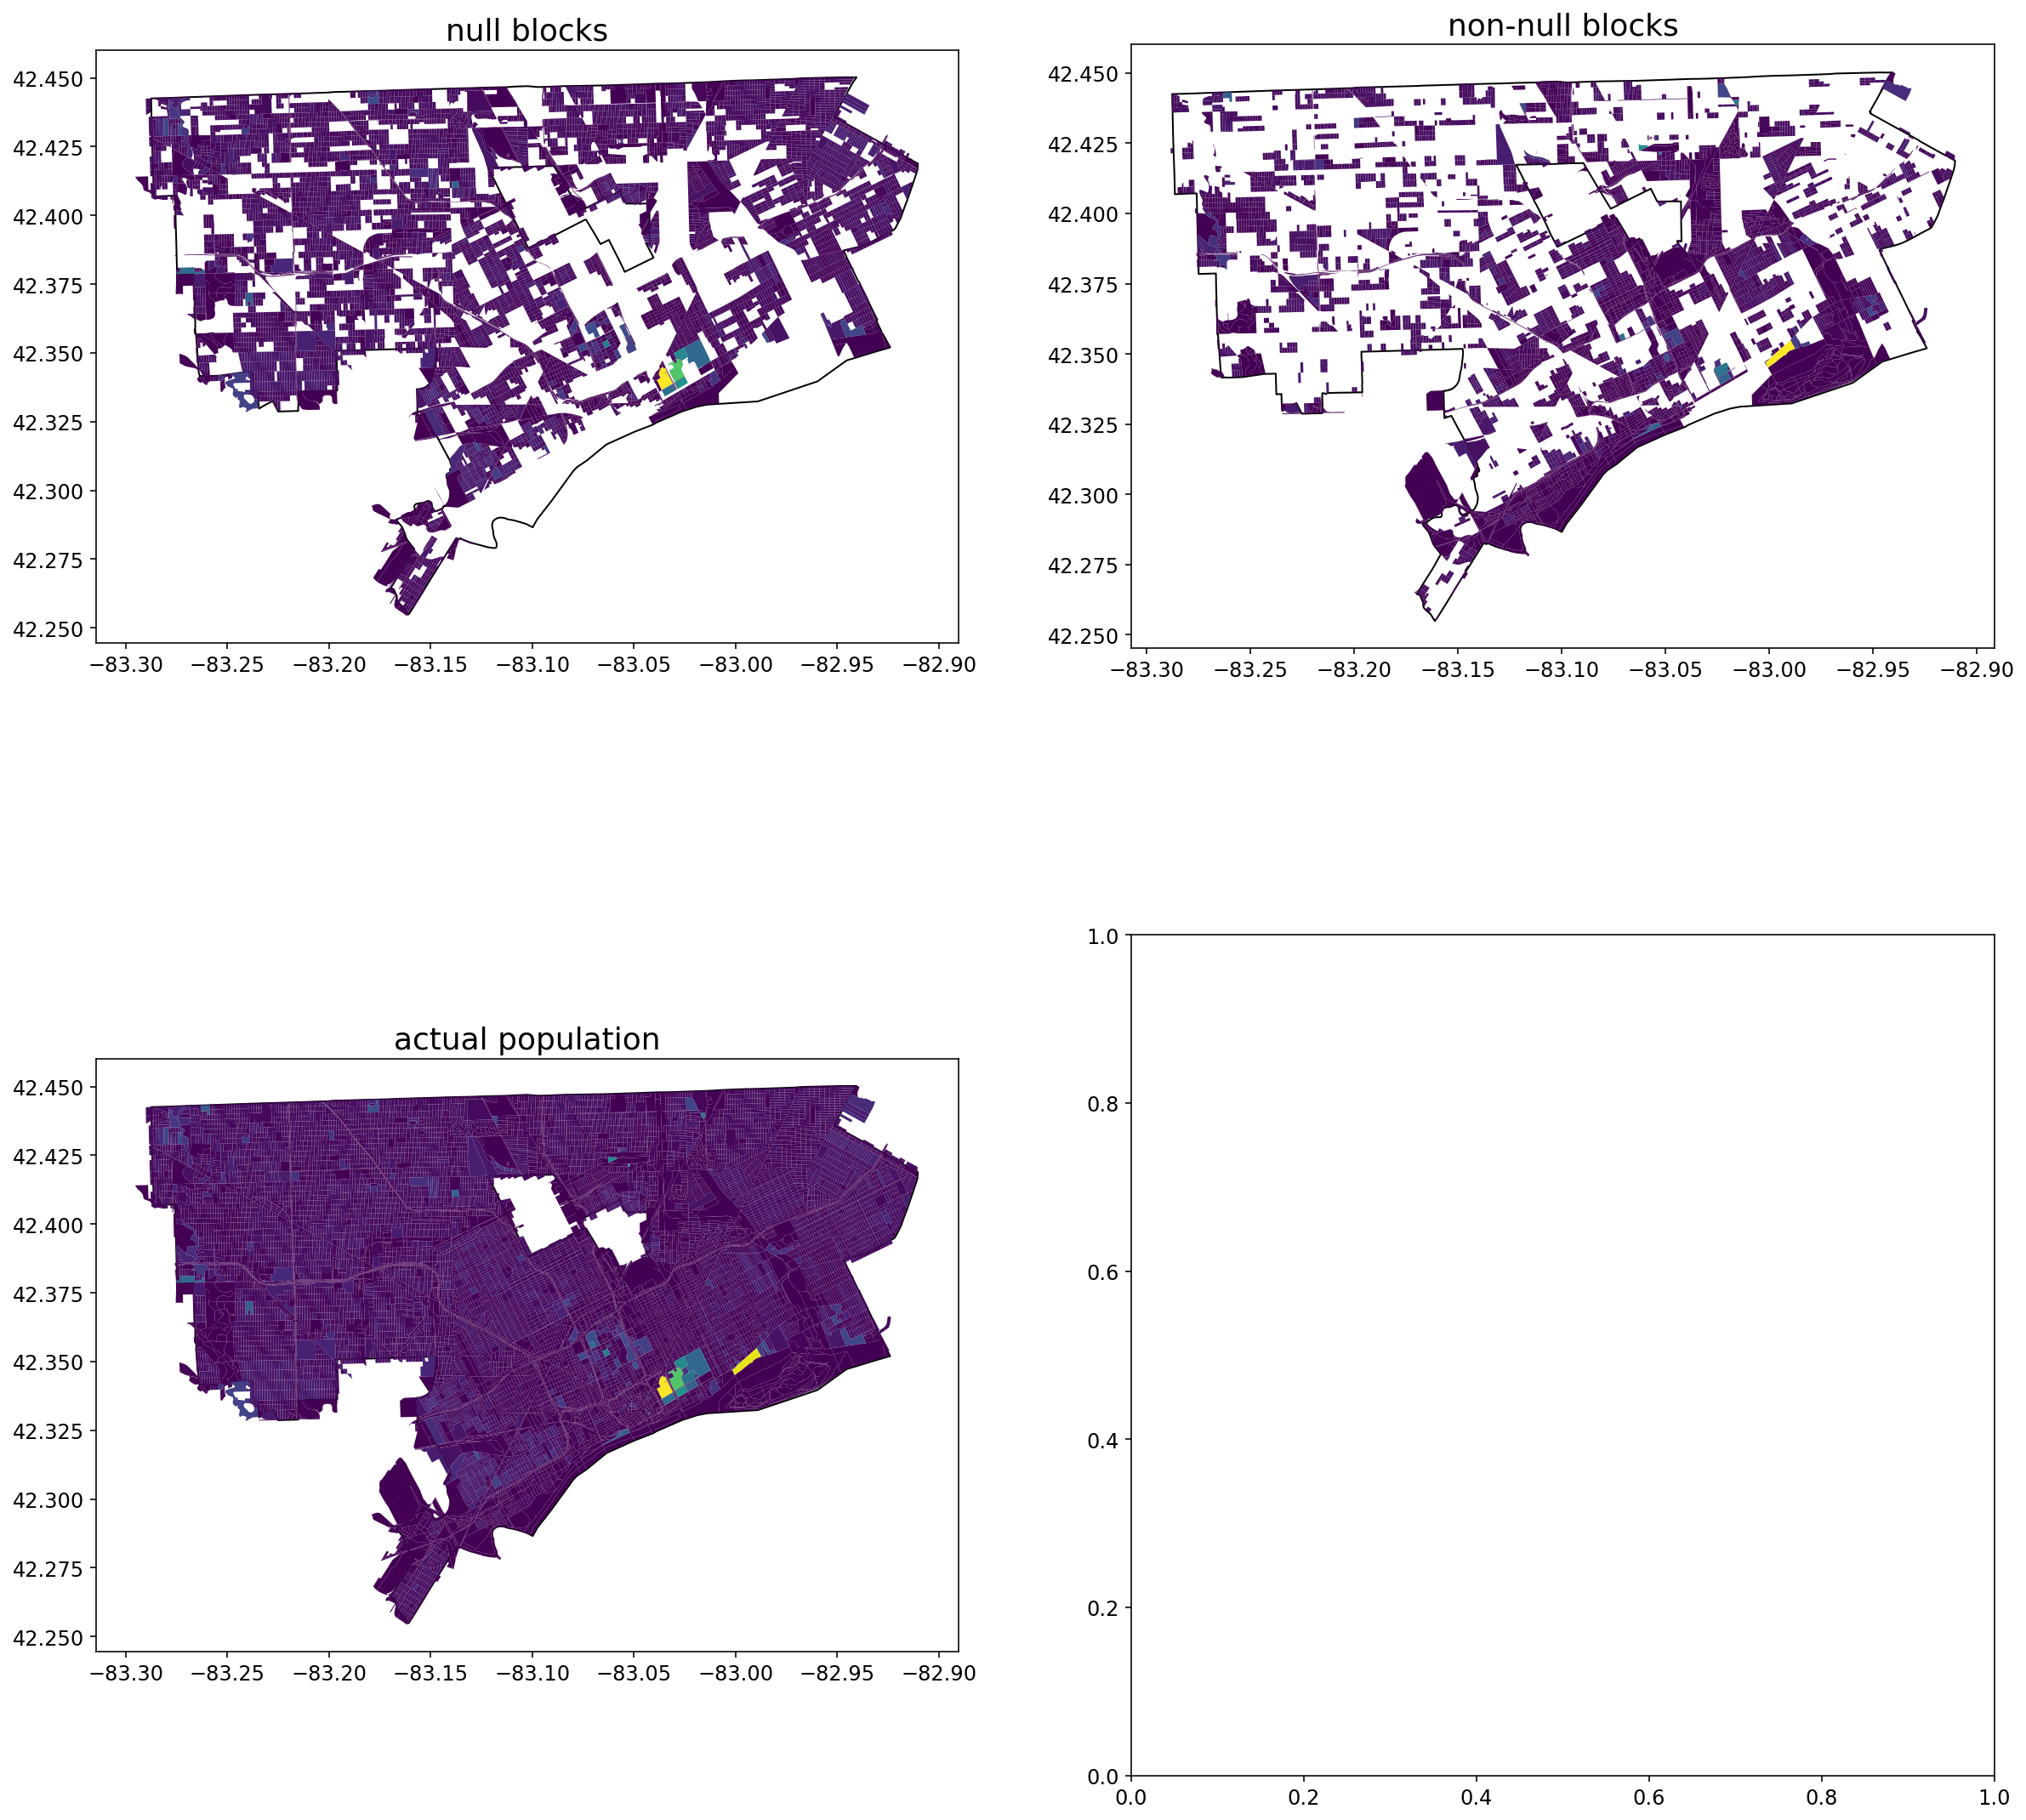

In [3]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
for x in [ax[0,0],ax[0,1],ax[1,0]]:
    detroit.plot(ax=x,edgecolor='k',facecolor='w')
t.loc[lambda x: x.old.isna()].plot("new",ax=ax[0,0])
t.loc[lambda x: x.old.notnull()].plot("new",ax=ax[0,1])
t.plot("new",ax=ax[1,0])
ax[0,0].set(title='null blocks')
ax[0,1].set(title='non-null blocks')
ax[1,0].set(title='actual population')